# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's Pendulum-v0 environment.

### 1. Import the Necessary Packages

In [1]:
# render ai gym environment
# import gym
import gymnasium as gym  # new version of gym

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

### 2. Instantiate the Environment and Agent

In [2]:
# https://gymnasium.farama.org/environments/classic_control/pendulum/
# env = gym.make('Pendulum-v0')
env = gym.make('Pendulum-v1', render_mode="rgb_array")
# env.seed(2)
agent = Agent(state_size=3, action_size=1, random_seed=2,
                a_fc1_units=20, a_fc2_units=20,
                c_fc1_units=50, c_fc2_units=50
             )


In [3]:
observation_space = env.observation_space
observation_space

Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)

In [4]:
action_space = env.action_space
action_space

Box(-2.0, 2.0, (1,), float32)

In [5]:
observation_space.sample()

array([ 0.02890979,  0.740831  , -0.13735592], dtype=float32)

### 3. Train the Agent with DDPG

In [10]:
def ddpg(n_episodes=1000, max_t=300, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        # state = env.reset()
        state, _ = env.reset()                                    # new gymnasium
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            # next_state, reward, done, _ = env.step(action)
            next_state, reward, done, _, _ = env.step(action)     # new gymnasium
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: -1023.04
Episode 200	Average Score: -1075.72
Episode 300	Average Score: -1144.91
Episode 400	Average Score: -1165.25
Episode 500	Average Score: -1148.89
Episode 600	Average Score: -1022.17
Episode 700	Average Score: -1000.88
Episode 800	Average Score: -1116.82
Episode 900	Average Score: -1056.79
Episode 1000	Average Score: -1048.00


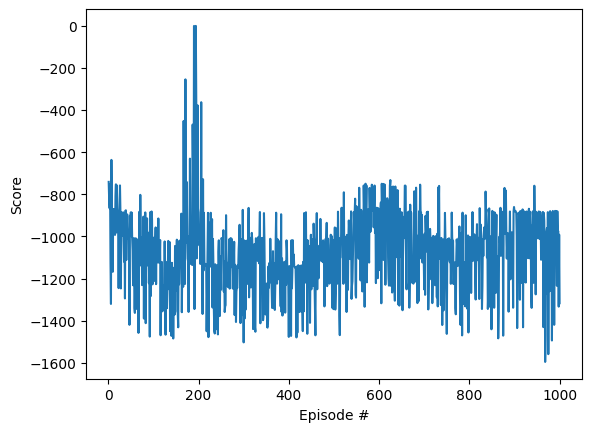

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In [6]:
# should already be installed in my docker file
# !python -m pip install pyvirtualdisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [7]:
# !cp checkpoint_actor.pth checkpoint_actor_fc20_2000eps.pth
# !cp checkpoint_critic.pth checkpoint_critic_fc50_2000eps.pth

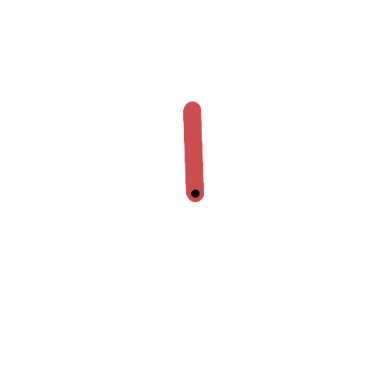

In [12]:
# my model 
# actor fc1 = 10
# actor fc2 = 10
# critic fc1 = 10
# critic fc2 = 10
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

# # previously trained model
# agent.actor_local.load_state_dict(torch.load('./trained-model/checkpoint_actor.pth'))
# agent.critic_local.load_state_dict(torch.load('./trained-model/checkpoint_critic.pth'))

# state = env.reset()
state, _ = env.reset()

# img = plt.imshow(env.render(mode='rgb_array'))
img = plt.imshow(env.render())

for t in range(1000):
    # Note... while trained with a noise_factor of 1.0, it can only handle a noise 
    #         factor of 0.45 with actor fc20 critic fc50
    action = agent.act(state, add_noise=True, noise_factor=0.45)

    #
    # save to output
    #
    # env.render()
    # img.set_data(env.render(mode='rgb_array')) 
    img.set_data(env.render()) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)

    # state, reward, done, _ = env.step(action)
    state, reward, done, _, _ = env.step(action)   # new gymnasium
    if done:
        break 

env.close()

In [7]:
!pwd

/mnt/reinforcement_learning/ddpg-pendulum


### 6. Explore

In this exercise, we have provided a sample DDPG agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster than this benchmark implementation.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task!
- Write your own DDPG implementation.  Use this code as reference only when needed -- try as much as you can to write your own algorithm from scratch.
- You may also like to implement prioritized experience replay, to see if it speeds learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has [been shown](https://blog.openai.com/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.  Make this change to the code, to verify it for yourself!
- Write a blog post explaining the intuition behind the DDPG algorithm and demonstrating how to use it to solve an RL environment of your choosing.  